<a href="https://colab.research.google.com/github/Deepakkumar5570/lab1-project/blob/main/Focus_score_imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/surya2003-real/Plant-disease-detection.git

Cloning into 'Plant-disease-detection'...
remote: Enumerating objects: 82, done.
remote: Total 82 (delta 0), reused 0 (delta 0), pack-reused 82 (from 1)
Receiving objects: 100% (82/82), 267.80 MiB | 29.52 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Updating files: 100% (36/36), done.


In [ ]:
!git clone https://github.com/pratikkayal/PlantDoc-Object-Detection-Dataset.git




Cloning into 'PlantDoc-Object-Detection-Dataset'...
remote: Enumerating objects: 5196, done.
remote: Counting objects: 100% (1956/1956), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 5196 (delta 1926), reused 1815 (delta 1815), pack-reused 3240 (from 1)
Receiving objects: 100% (5196/5196), 941.87 MiB | 46.36 MiB/s, done.
Resolving deltas: 100% (2441/2441), done.
Updating files: 100% (5200/5200), done.


In [ ]:
!pip install ultralytics opencv-python matplotlib -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load trained YOLOv8 model
model_path = "/content/Plant-disease-detection/YOLOv8_training/best.pt"
model = YOLO(model_path)

WARNING ⚠️ /content/Plant-disease-detection/YOLOv8_training/best.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolo11n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

In [ ]:

from concurrent.futures import ThreadPoolExecutor, as_completed
from pathlib import Path
from matplotlib import pyplot as plt

In [ ]:

def focus_measure_laplacian(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    return laplacian.var()  # Variance of Laplacian as a focus measure

In [ ]:
def focus_measure_entropy(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist = hist / hist.sum()  # Normalize histogram
    entropy = -np.sum(hist * np.log(hist + 1e-6))  # Avoid log(0) by adding small constant
    return entropy  # Entropy as a focus measure

In [ ]:

def calculate_focus_score(image, bbox, method='tenengrad'):
    x_center, y_center, w, h = bbox
    x = int(x_center - w / 2)
    y = int(y_center - h / 2)
    roi = image[y:y + int(h), x:x + int(w)]  # Extract region of interest

    if roi.size == 0:
        return 0

    if method == 'tenengrad':
        return np.sum(roi) / (w * h)  # Tenengrad score
    elif method == 'laplacian':
        return focus_measure_laplacian(roi)  # Laplacian variance
    elif method == 'entropy':
        return focus_measure_entropy(roi)  # Entropy score
    return 0

In [ ]:
def process_images_parallel(dataset_path, model, method='tenengrad'):
    focus_scores = []
    image_paths = list(Path(dataset_path).rglob('*.jpg'))  # List of image paths

    with ThreadPoolExecutor() as executor:
        futures = []
        for image_path in image_paths:
            futures.append(executor.submit(process_image, image_path, model, method))

        for future in as_completed(futures):
            result = future.result()
            focus_scores.append(result)

    return focus_scores

def process_image(image_path, model, method):
    image = cv2.imread(str(image_path))
    if image is None:
        print(f"Could not load image: {image_path}")
        return None  # Skip if the image is corrupt or missing

    results = model(image)  # YOLO inference
    predictions = results[0]

    focus_data = []
    for box, class_id, score in zip(predictions.boxes.xywh.cpu().numpy(), predictions.boxes.cls.cpu().numpy(), predictions.boxes.conf.cpu().numpy()):
        x_center, y_center, width, height = box
        focus_score = calculate_focus_score(image, [x_center, y_center, width, height], method)
        focus_data.append({
            'image': str(image_path),
            'x_center': x_center,
            'y_center': y_center,
            'width': width,
            'height': height,
            'class_id': class_id,
            'confidence': score,
            'focus_score': focus_score
        })

    return focus_data



For only images

Main Output

In [32]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
from pathlib import Path
from ultralytics import YOLO

# Load YOLOv8 model
model_path = "/content/Plant-disease-detection/YOLOv8_training/best.pt"
model = YOLO(model_path)

# Dataset path
dataset_path = "/content/PlantDoc-Object-Detection-Dataset/TEST"

# Valid image extensions
valid_image_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]

# Output paths
output_csv_path = "/content/OUTPUT/focus_scores.csv"
output_images_folder = "/content/OUTPUT/Processed_Images"
os.makedirs(output_images_folder, exist_ok=True)

focus_data = []  # Stores focus scores for CSV


def compute_focus_score(image):
    """
    Computes the focus score using the Laplacian variance method.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    focus_score = laplacian.var()  # Original focus score calculation
    return round(focus_score, 2)

def process_image(image_path):
    """
    Process a single image: detects objects, crops regions, calculates focus scores,
    and saves results.

    Args:
        image_path (str): Path to the input image.
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Skipping invalid image: {image_path}")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Ensure image is valid before processing
    if not isinstance(image_rgb, np.ndarray) or image_rgb.size == 0:
        print(f"Skipping processing: Invalid image {image_path}")
        return

    results = model(image_path, device="cuda")  # Use GPU if available for faster inference

    focus_scores = []
    total_focus = 0
    num_detections = 0

    for result in results:
        boxes = result.boxes.xywh.cpu().numpy()

        for box in boxes:
            x_center, y_center, width, height = box
            x1, y1, x2, y2 = int(x_center - width / 2), int(y_center - height / 2), int(x_center + width / 2), int(y_center + height / 2)

            cropped_object = image_rgb[max(0, y1):min(y2, image_rgb.shape[0]), max(0, x1):min(x2, image_rgb.shape[1])]

            if cropped_object.size == 0:
                continue  # Skip if the cropped object is empty

            focus_score = compute_focus_score(cropped_object)
            focus_scores.append(focus_score)
            total_focus += focus_score
            num_detections += 1

            # Draw bounding box with a fixed thickness
            color = (0, 255, 0)  # Green for bounding box
            thickness = 3  # Consistent thickness
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, thickness)

            # Change focus score text color
            text_color = (255, 255, 0)  # Yellow for visibility
            label = f"FS: {focus_score:.2f}"
            cv2.putText(image_rgb, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 2)

    avg_focus_score = round(total_focus / num_detections, 2) if num_detections > 0 else 0

    # Save the processed image
    save_file = os.path.join(output_images_folder, os.path.basename(image_path))
    cv2.imwrite(save_file, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

    # Store focus data
    focus_data.append({'image_path': save_file, 'focus_scores': focus_scores, 'average_focus_score': avg_focus_score})

    print(f"Processed: {save_file} | Focus Scores: {focus_scores} | Avg Focus Score: {avg_focus_score}")

    # **Fix: Validate image before displaying**
    if isinstance(image_rgb, np.ndarray) and image_rgb.size > 0:
        plt.figure(figsize=(5, 5))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()
    else:
        print(f"Skipping display: Invalid image {image_path}")




Processed: /content/OUTPUT/Processed_Images/DSCN7317.JPG.jpg | Focus Scores: [90.09] | Avg Focus Score: 90.09


FileNotFoundError: [Errno 2] No such file or directory: 'YOLOv8_training/best.pt'

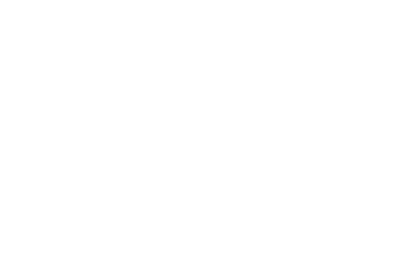

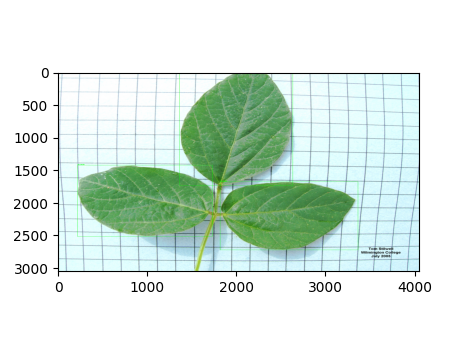

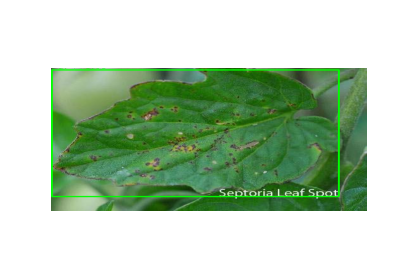

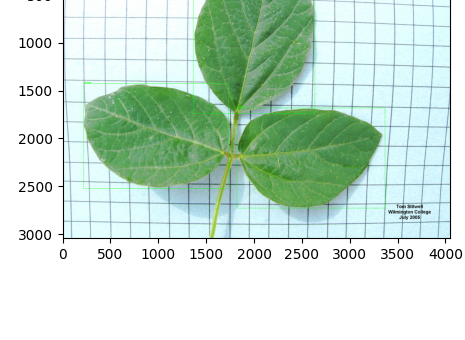

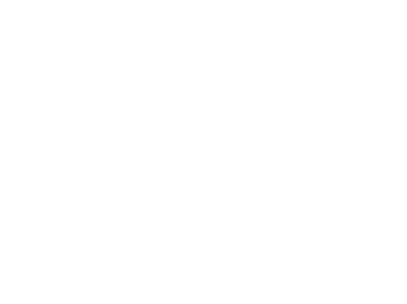

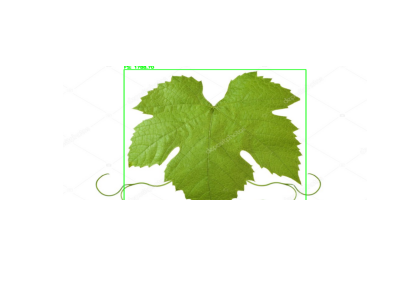

image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/apples_apple-scab_10_zoom.jpg: 480x640 1 leaf, 37.6ms
Speed: 4.0ms preprocess, 37.6ms inference, 4.6ms postprocess per image at shape (1, 3, 480, 640)
Processed: /content/OUTPUT/Processed_Images/apples_apple-scab_10_zoom.jpg | Focus Scores: [700.68] | Avg Focus Score: 700.68


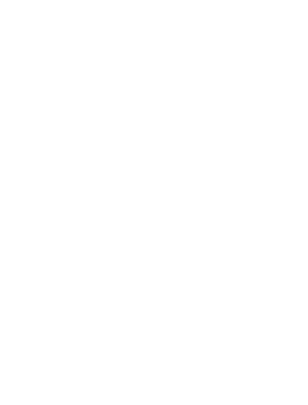


image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/pepper_leaf.jpg: 640x480 2 leafs, 33.8ms
Speed: 7.3ms preprocess, 33.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Processed: /content/OUTPUT/Processed_Images/pepper_leaf.jpg | Focus Scores: [1868.14, 5382.83] | Avg Focus Score: 3625.48


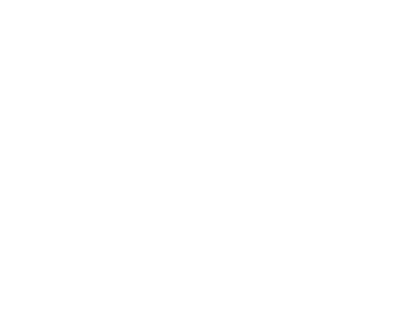


image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/strawberry-leaves-isolated-white-17473157.jpg: 640x640 6 leafs, 49.0ms
Speed: 11.6ms preprocess, 49.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Processed: /content/OUTPUT/Processed_Images/strawberry-leaves-isolated-white-17473157.jpg | Focus Scores: [703.08, 611.29, 814.09, 638.99, 1023.54, 914.16] | Avg Focus Score: 784.19


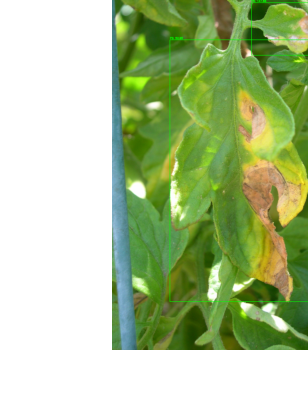

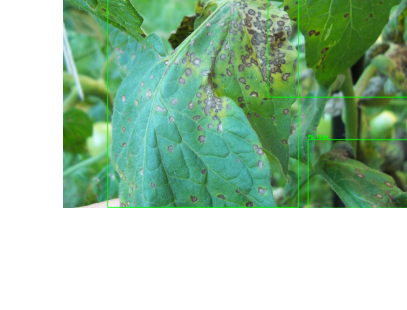

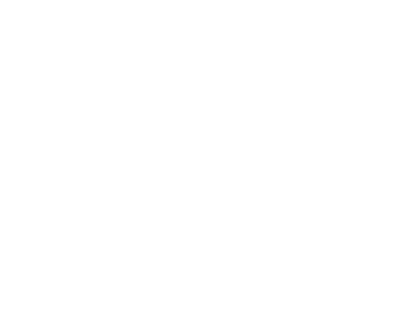


image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/apples_apple-scab_02_thm.jpg: 480x640 2 leafs, 65.1ms
Speed: 2.7ms preprocess, 65.1ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 640)
Processed: /content/OUTPUT/Processed_Images/apples_apple-scab_02_thm.jpg | Focus Scores: [1438.86, 1728.92] | Avg Focus Score: 1583.89


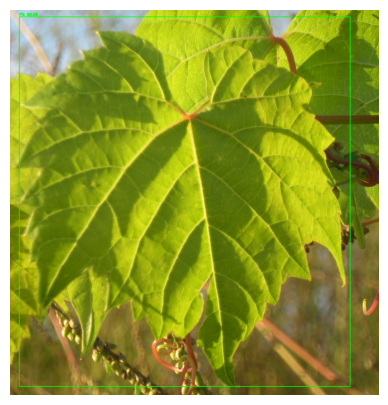

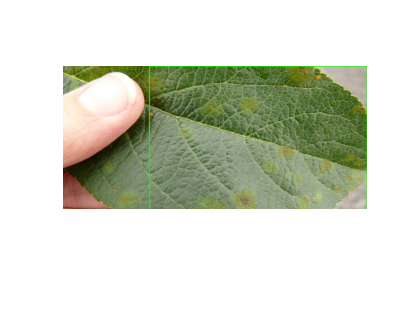

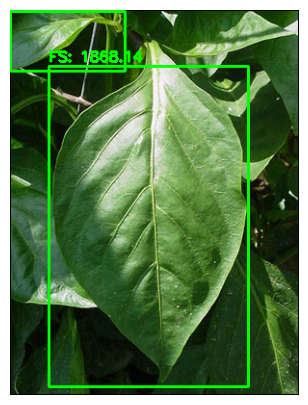

image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/2013Corn_GrayLeafSpot_0815_0003.JPG.jpg: 480x640 1 leaf, 56.2ms
Speed: 12.5ms preprocess, 56.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

Processed: /content/OUTPUT/Processed_Images/2013Corn_GrayLeafSpot_0815_0003.JPG.jpg | Focus Scores: [588.12] | Avg Focus Score: 588.12
image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/depositphotos_2795312-stock-photo-green-raspberry-leaf.jpg: 480x640 3 leafs, 56.9ms
Speed: 10.6ms preprocess, 56.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)
Processed: /content/OUTPUT/Processed_Images/depositphotos_2795312-stock-photo-green-raspberry-leaf.jpg | Focus Scores: [981.07, 1417.14, 1849.87] | Avg Focus Score: 1416.03


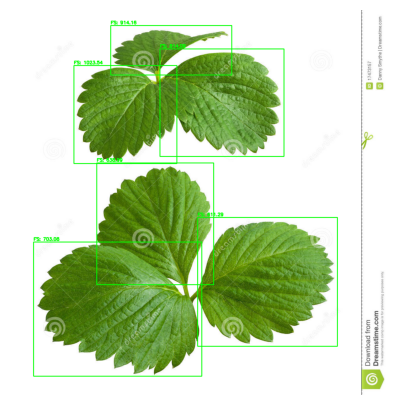

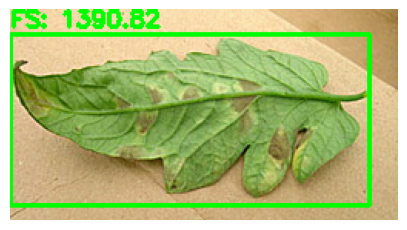


image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/strawberry-leaves-collection-white-background-36684676.jpg: 480x640 7 leafs, 40.3ms
Speed: 8.9ms preprocess, 40.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/20090710-lateblight.jpg: 480x640 1 leaf, 44.0ms
Processed: /content/OUTPUT/Processed_Images/strawberry-leaves-collection-white-background-36684676.jpg | Focus Scores: [1647.81, 591.37, 536.91, 580.33, 1847.66, 1565.26, 979.33] | Avg Focus Score: 1106.95
Speed: 3.2ms preprocess, 44.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Processed: /content/OUTPUT/Processed_Images/20090710-lateblight.jpg | Focus Scores: [186.06] | Avg Focus Score: 186.06


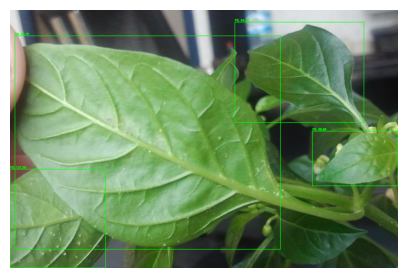



image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/squashsilver2.JPG.jpg: 480x640 2 leafs, 48.8ms
Speed: 9.7ms preprocess, 48.8ms inference, 5.7ms postprocess per image at shape (1, 3, 480, 640)
Processed: /content/OUTPUT/Processed_Images/squashsilver2.JPG.jpg | Focus Scores: [283.22, 228.6] | Avg Focus Score: 255.91


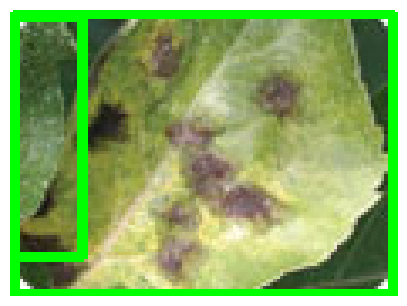

image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/blueberrysilverleaf16-1372b.jpg: 512x640 2 leafs, 35.4ms
Speed: 9.1ms preprocess, 35.4ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)

Processed: /content/OUTPUT/Processed_Images/blueberrysilverleaf16-1372b.jpg | Focus Scores: [141.61, 172.84] | Avg Focus Score: 157.23
image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/five-cherry-tree-green-leaves-white-isolated-background-34493587.jpg: 640x512 5 leafs, 231.6ms
Speed: 21.0ms preprocess, 231.6ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 512)


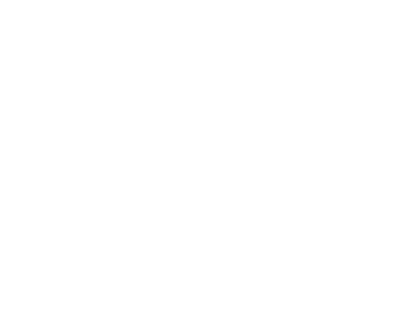

Processed: /content/OUTPUT/Processed_Images/five-cherry-tree-green-leaves-white-isolated-background-34493587.jpg | Focus Scores: [2447.67, 1126.23, 2640.51, 1844.2, 1855.84] | Avg Focus Score: 1982.89


image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/brleaf2_zoom.jpg: 480x640 1 leaf, 78.0ms
Speed: 3.9ms preprocess, 78.0ms inference, 6.3ms postprocess per image at shape (1, 3, 480, 640)


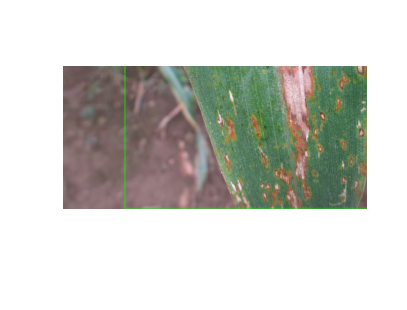

Processed: /content/OUTPUT/Processed_Images/brleaf2_zoom.jpg | Focus Scores: [438.87] | Avg Focus Score: 438.87


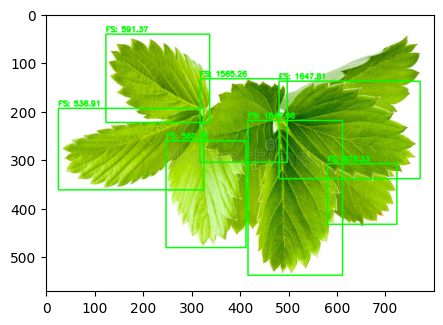

image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/20180511_090912-14gtw8a-e1526047952754.jpg: 640x384 1 leaf, 73.2ms
Speed: 3.9ms preprocess, 73.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


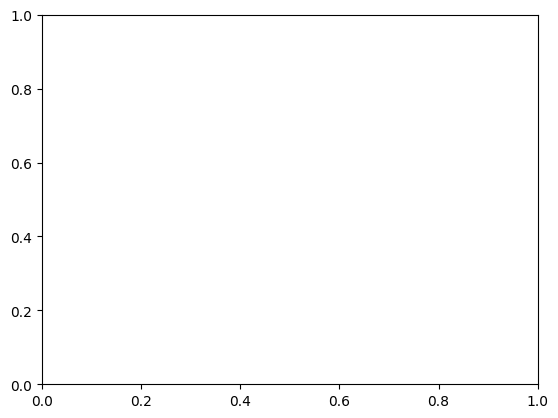

Processed: /content/OUTPUT/Processed_Images/20180511_090912-14gtw8a-e1526047952754.jpg | Focus Scores: [112.69] | Avg Focus Score: 112.69


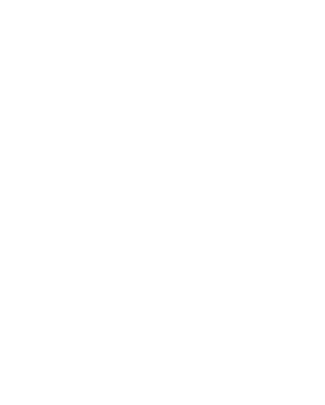

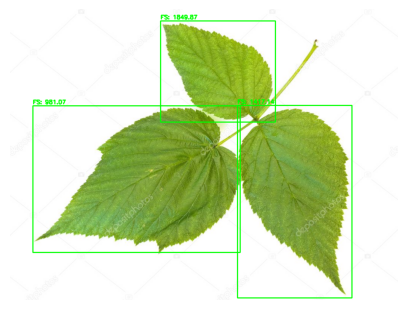

image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/Tomato%2BBacterial%2BSpot%2Bon%2BLeaves.jpg: 352x640 2 leafs, 112.4ms
Speed: 3.1ms preprocess, 112.4ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)
Processed: /content/OUTPUT/Processed_Images/Tomato%2BBacterial%2BSpot%2Bon%2BLeaves.jpg | Focus Scores: [1444.91, 1612.46] | Avg Focus Score: 1528.68


image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/039b47d574bc4bb8a14259a1cd96a741.jpg: 512x640 1 leaf, 43.0ms
Speed: 11.3ms preprocess, 43.0ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)
Processed: /content/OUTPUT/Processed_Images/039b47d574bc4bb8a14259a1cd96a741.jpg | Focus Scores: [309.28] | Avg Focus Score: 309.28


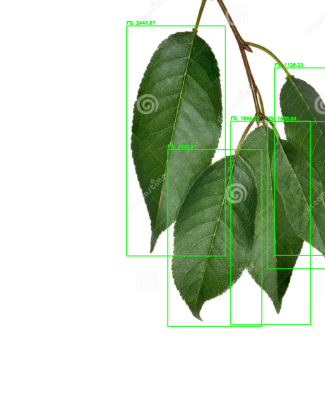

image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/2256-body-1501555581-1.jpg: 480x640 1 leaf, 29.1ms
Speed: 4.6ms preprocess, 29.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


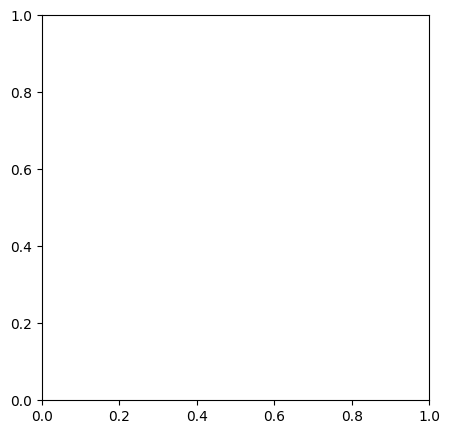


Processed: /content/OUTPUT/Processed_Images/2256-body-1501555581-1.jpg | Focus Scores: [24.16] | Avg Focus Score: 24.16
image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/d7b79dbc0bca0eb3e63fbe5dfb256ccd53d90a4eb1413_1260x1260.jpg: 640x544 1 leaf, 101.9ms
Speed: 11.8ms preprocess, 101.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)
Processed: /content/OUTPUT/Processed_Images/d7b79dbc0bca0eb3e63fbe5dfb256ccd53d90a4eb1413_1260x1260.jpg | Focus Scores: [608.14] | Avg Focus Score: 608.14


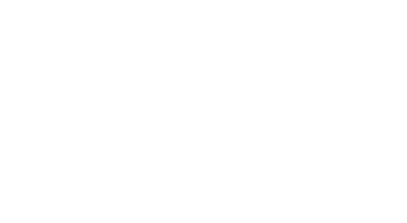

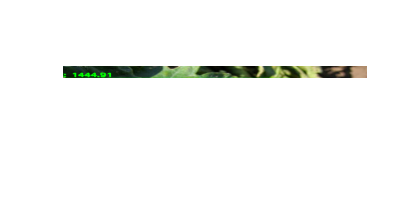

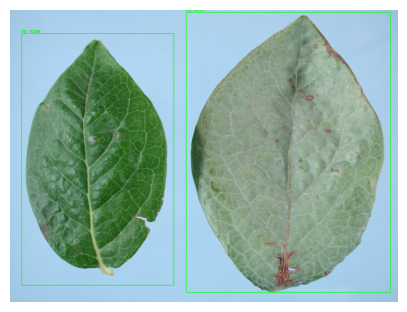

image 1/1 /content/PlantDoc-Object-Detection-Dataset/TEST/GREEN%20BELL%20PLANT%20YELLOW%20LEAF.JPG.jpg: 480x640 4 leafs, 35.9ms
Speed: 15.7ms preprocess, 35.9ms inference, 14.7ms postprocess per image at shape (1, 3, 480, 640)
Processed: /content/OUTPUT/Processed_Images/GREEN%20BELL%20PLANT%20YELLOW%20LEAF.JPG.jpg | Focus Scores: [217.93, 586.65, 186.63, 442.37] | Avg Focus Score: 358.4


In [36]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
from pathlib import Path
from ultralytics import YOLO

# Load YOLOv8 model
model_path = "/content/Plant-disease-detection/YOLOv8_training/best.pt"
model = YOLO(model_path)

# Dataset path
dataset_path = "/content/PlantDoc-Object-Detection-Dataset/TEST"

# Valid image extensions
valid_image_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]

# Output paths
output_csv_path = "/content/OUTPUT/focus_scores.csv"
output_images_folder = "/content/OUTPUT/Processed_Images"
os.makedirs(output_images_folder, exist_ok=True)

focus_data = []  # Stores focus scores for CSV


def compute_focus_score(image):
    """
    Computes the focus score using the original method from the user's initial implementation.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    focus_score = laplacian.var()  # Original focus score calculation
    return round(focus_score, 2)


def process_image(image_path):
    """
    Process a single image: detects objects, crops regions, calculates focus scores,
    and saves results.

    Args:
        image_path (str): Path to the input image.
    """
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = model(image_path)  # Perform YOLO detection

    focus_scores = []
    total_focus = 0
    num_detections = 0

    for result in results:
        boxes = result.boxes.xywh.cpu().numpy()

        for box in boxes:
            x_center, y_center, width, height = box
            x1, y1, x2, y2 = int(x_center - width / 2), int(y_center - height / 2), int(x_center + width / 2), int(y_center + height / 2)

            cropped_object = image_rgb[max(0, y1):min(y2, image_rgb.shape[0]), max(0, x1):min(x2, image_rgb.shape[1])]

            if cropped_object.size == 0:
                continue  # Skip if the cropped object is empty

            focus_score = compute_focus_score(cropped_object)
            focus_scores.append(focus_score)
            total_focus += focus_score
            num_detections += 1

            # Draw bounding box and label
            color = (0, 255, 0)  # Green
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, 2)
            label = f"FS: {focus_score:.2f}"
            cv2.putText(image_rgb, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    avg_focus_score = round(total_focus / num_detections, 2) if num_detections > 0 else 0

    # Save the processed image
    save_file = os.path.join(output_images_folder, os.path.basename(image_path))
    cv2.imwrite(save_file, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

    # Store focus data
    focus_data.append({'image_path': save_file, 'focus_scores': focus_scores, 'average_focus_score': avg_focus_score})

    print(f"Processed: {save_file} | Focus Scores: {focus_scores} | Avg Focus Score: {avg_focus_score}")

    # Display the processed image
    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


def process_images_parallel():
    """
    Process images in parallel using ThreadPoolExecutor.
    """
    image_files = [str(img) for img in Path(dataset_path).rglob("*") if img.suffix.lower() in valid_image_extensions]

    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(process_image, img): img for img in image_files}

        for future in as_completed(futures):
            future.result()  # Ensure exceptions are raised if any


# Run the parallel processing
process_images_parallel()

# Save focus scores to CSV
df_focus = pd.DataFrame(focus_data)
df_focus.to_csv(output_csv_path, index=False)
print(f"Focus scores saved to {output_csv_path}")


#try this also to improve the model

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
from pathlib import Path
from ultralytics import YOLO

# Load YOLOv8 model
model_path = "/content/Plant-disease-detection/YOLOv8_training/best.pt"
model = YOLO(model_path)

# Dataset path
dataset_path = "/content/PlantDoc-Object-Detection-Dataset/TEST"

# Valid image extensions
valid_image_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}

# Output paths
output_csv_path = "/content/OUTPUT/focus_scores.csv"
output_images_folder = "/content/OUTPUT/Processed_Images"
os.makedirs(output_images_folder, exist_ok=True)

focus_data = []  # Stores focus scores for CSV


def compute_focus_score(image):
    """
    Computes the focus score using Laplacian variance.
    A higher variance indicates a sharper (more focused) image.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    return round(laplacian.var(), 2)


def process_image(image_path):
    """
    Processes a single image:
    - Runs YOLO detection
    - Extracts bounding boxes & crops objects
    - Computes focus scores
    - Saves annotated images
    - Logs results

    Args:
        image_path (str): Path to the input image.
    """
    try:
        # Read the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Skipping: {image_path} (Unreadable file)")
            return

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Perform YOLO detection
        results = model(image_path)
        focus_scores = []
        total_focus = 0
        num_detections = 0

        for result in results:
            boxes = result.boxes.xywh.cpu().numpy() if hasattr(result, 'boxes') else []

            for box in boxes:
                x_center, y_center, width, height = box
                x1, y1, x2, y2 = (
                    int(x_center - width / 2),
                    int(y_center - height / 2),
                    int(x_center + width / 2),
                    int(y_center + height / 2),
                )

                # Ensure coordinates are within bounds
                x1, y1 = max(0, x1), max(0, y1)
                x2, y2 = min(x2, image_rgb.shape[1]), min(y2, image_rgb.shape[0])

                cropped_object = image_rgb[y1:y2, x1:x2]

                if cropped_object.size == 0:
                    continue  # Skip empty crops

                focus_score = compute_focus_score(cropped_object)
                focus_scores.append(focus_score)
                total_focus += focus_score
                num_detections += 1

                # Draw bounding box and label
                color = (0, 255, 0)  # Green
                cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, 2)
                label = f"FS: {focus_score:.2f}"
                cv2.putText(image_rgb, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Calculate average focus score
        avg_focus_score = round(total_focus / num_detections, 2) if num_detections > 0 else 0

        # Save the processed image
        save_file = os.path.join(output_images_folder, os.path.basename(image_path))
        cv2.imwrite(save_file, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

        # Store focus data
        focus_data.append({
            'image_path': save_file,
            'focus_scores': focus_scores,
            'average_focus_score': avg_focus_score,
        })

        print(f"✅ Processed: {save_file} | Avg Focus Score: {avg_focus_score}")

        # Display the processed image
        plt.figure(figsize=(5, 5))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"❌ Error processing {image_path}: {e}")


def process_images_parallel():
    """
    Processes images in parallel using ThreadPoolExecutor for efficiency.
    """
    image_files = [
        str(img) for img in Path(dataset_path).rglob("*")
        if img.suffix.lower() in valid_image_extensions
    ]

    print(f"🔍 Found {len(image_files)} images for processing...")

    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(process_image, img): img for img in image_files}

        for future in as_completed(futures):
            future.result()  # Ensure exceptions are raised if any


# Run the parallel processing
process_images_parallel()

# Save focus scores to CSV
df_focus = pd.DataFrame(focus_data)
df_focus.to_csv(output_csv_path, index=False)

print(f"📁 Focus scores saved to: {output_csv_path}")


for images